<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Cardiovascular Disease</b></center>

<center><b><h2>Model Training</b></center>
<pre>

### Import libraries

In [229]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, learning_curve, StratifiedKFold, learning_curve
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.calibration import calibration_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.pipeline import Pipeline
import joblib
import json

### Load dataset

In [231]:
df = pd.read_csv("../data/cardio_train.csv", sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Shape of dataset

In [233]:
print("Shape of dataset:", df.shape)

Shape of dataset: (70000, 13)


In [235]:
valueCounts = df['cardio'].value_counts()

without_heart_disease = valueCounts[0]
with_heart_disease = valueCounts[1]

### Datatypes

In [237]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

### Info

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


### Check Null Values

In [241]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

### Drop unnecessary column

In [243]:
df = df.drop(columns=['id'], errors='ignore')
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Drop duplicates

In [245]:
df = df.drop_duplicates()

In [247]:
df.shape

(69976, 12)

### Statistical summary

In [249]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,19468.950126,1.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,2467.374620,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Boxplot before outlier cleaning

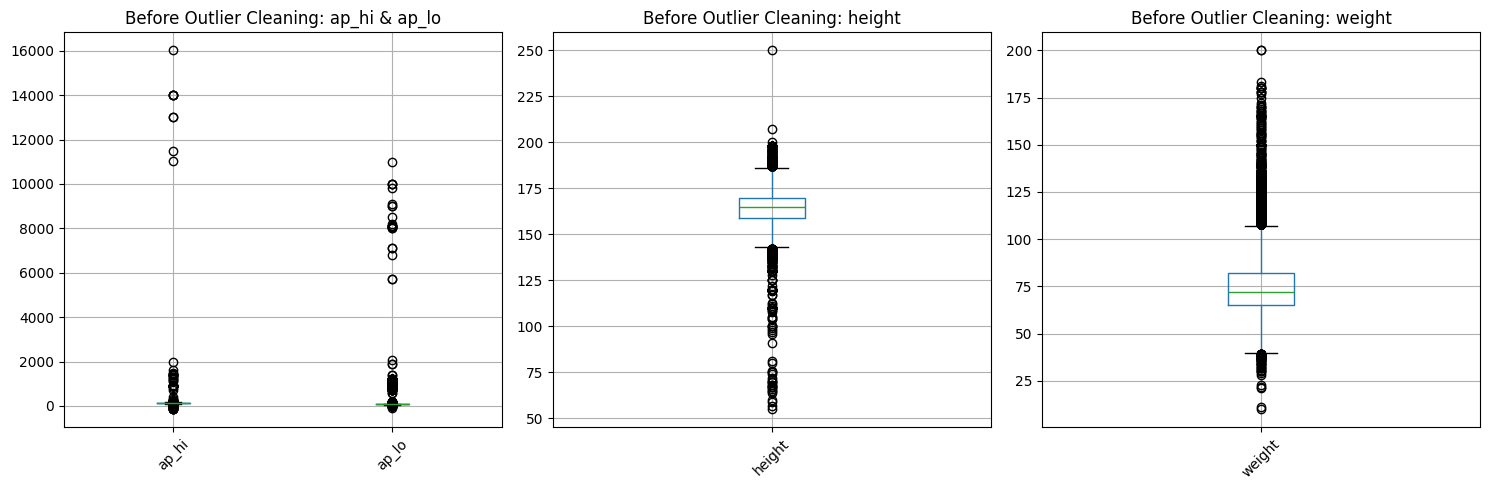

In [251]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
df[['ap_hi', 'ap_lo']].boxplot()
plt.xticks(rotation=45)
plt.title("Before Outlier Cleaning: ap_hi & ap_lo")

plt.subplot(1, 3, 2)
df[['height']].boxplot()
plt.xticks(rotation=45)
plt.title("Before Outlier Cleaning: height")

plt.subplot(1, 3, 3)
df[['weight']].boxplot()
plt.xticks(rotation=45)
plt.title("Before Outlier Cleaning: weight")

plt.tight_layout()
plt.show()

### Outlier Removal

In [253]:
def clean_logical(df):
    cleaned = df[
        (df['ap_hi'].between(80, 240)) &
        (df['ap_lo'].between(40, 200)) &
        (df['ap_hi'] > df['ap_lo']) &
        (df['height'].between(90, 240)) &
        (df['weight'].between(30, 220))
    ].copy()
    return cleaned

In [255]:
df = clean_logical(df)

In [257]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


### Boxplot after outlier cleaning

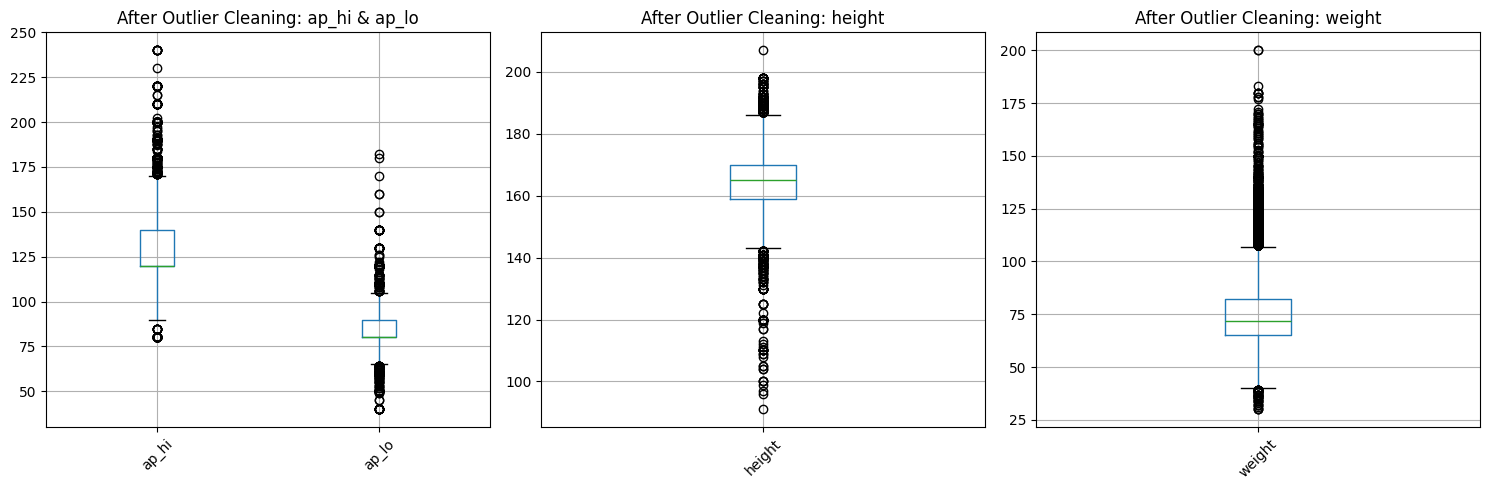

In [259]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
df[['ap_hi', 'ap_lo']].boxplot()
plt.xticks(rotation=45)
plt.title("After Outlier Cleaning: ap_hi & ap_lo")

plt.subplot(1, 3, 2)
df[['height']].boxplot()
plt.xticks(rotation=45)
plt.title("After Outlier Cleaning: height")

plt.subplot(1, 3, 3)
df[['weight']].boxplot()
plt.xticks(rotation=45)
plt.title("After Outlier Cleaning: weight")

plt.tight_layout()
plt.show()

## Feature Engineering

### Convert Age (days -> years)

In [261]:
age_years = (df['age'] / 365).astype(int)
age_index = df.columns.get_loc('age') + 1
df.insert(loc=age_index, column='age_years', value=age_years)

df.drop(columns=['age'], inplace=True)

df

,age_years,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


### BMI calculation

In [263]:
df.insert(4, 'BMI', df['weight'] / ((df['height'] / 100) ** 2))

df.drop(columns=['height','weight'], inplace=True)

df

,age_years,gender,BMI,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,21.967120,110,80,1,1,0,0,1,0
1,55,1,34.927679,140,90,3,1,0,0,1,1
2,51,1,23.507805,130,70,3,1,0,0,0,1
3,48,2,28.710479,150,100,1,1,0,0,1,1
4,47,1,23.011177,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,26.927438,120,80,1,1,1,0,1,0
69996,61,1,50.472681,140,90,2,2,0,0,1,1
69997,52,2,31.353579,180,90,3,1,0,1,0,1
69998,61,1,27.099251,135,80,1,2,0,0,0,1


### Pulse pressure calculation

In [265]:
df.insert(5, 'pulse_pressure', df['ap_hi'] - df['ap_lo'])

df

,age_years,gender,BMI,ap_hi,ap_lo,pulse_pressure,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,21.967120,110,80,30,1,1,0,0,1,0
1,55,1,34.927679,140,90,50,3,1,0,0,1,1
2,51,1,23.507805,130,70,60,3,1,0,0,0,1
3,48,2,28.710479,150,100,50,1,1,0,0,1,1
4,47,1,23.011177,100,60,40,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,26.927438,120,80,40,1,1,1,0,1,0
69996,61,1,50.472681,140,90,50,2,2,0,0,1,1
69997,52,2,31.353579,180,90,90,3,1,0,1,0,1
69998,61,1,27.099251,135,80,55,1,2,0,0,0,1


### Gender column

In [267]:
# 0:female, 1:male

df['gender'] = df['gender'].apply(lambda x: 1 if x == 2 else 0)
df

,age_years,gender,BMI,ap_hi,ap_lo,pulse_pressure,cholesterol,gluc,smoke,alco,active,cardio
0,50,1,21.967120,110,80,30,1,1,0,0,1,0
1,55,0,34.927679,140,90,50,3,1,0,0,1,1
2,51,0,23.507805,130,70,60,3,1,0,0,0,1
3,48,1,28.710479,150,100,50,1,1,0,0,1,1
4,47,0,23.011177,100,60,40,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,1,26.927438,120,80,40,1,1,1,0,1,0
69996,61,0,50.472681,140,90,50,2,2,0,0,1,1
69997,52,1,31.353579,180,90,90,3,1,0,1,0,1
69998,61,0,27.099251,135,80,55,1,2,0,0,0,1


### Cholestrol and Glucose columns

In [269]:
df.insert(8, 'cholesterol_gluc_interaction', df['cholesterol'] * df['gluc'])
df

,age_years,gender,BMI,ap_hi,ap_lo,pulse_pressure,cholesterol,gluc,cholesterol_gluc_interaction,smoke,alco,active,cardio
0,50,1,21.967120,110,80,30,1,1,1,0,0,1,0
1,55,0,34.927679,140,90,50,3,1,3,0,0,1,1
2,51,0,23.507805,130,70,60,3,1,3,0,0,0,1
3,48,1,28.710479,150,100,50,1,1,1,0,0,1,1
4,47,0,23.011177,100,60,40,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,1,26.927438,120,80,40,1,1,1,1,0,1,0
69996,61,0,50.472681,140,90,50,2,2,4,0,0,1,1
69997,52,1,31.353579,180,90,90,3,1,3,0,1,0,1
69998,61,0,27.099251,135,80,55,1,2,2,0,0,0,1


In [271]:
df = pd.get_dummies(df, columns=['cholesterol', 'gluc'], prefix=['chol', 'gluc'], dtype=int, drop_first=True)
df

,age_years,gender,BMI,ap_hi,ap_lo,pulse_pressure,cholesterol_gluc_interaction,smoke,alco,active,cardio,chol_2,chol_3,gluc_2,gluc_3
0,50,1,21.967120,110,80,30,1,0,0,1,0,0,0,0,0
1,55,0,34.927679,140,90,50,3,0,0,1,1,0,1,0,0
2,51,0,23.507805,130,70,60,3,0,0,0,1,0,1,0,0
3,48,1,28.710479,150,100,50,1,0,0,1,1,0,0,0,0
4,47,0,23.011177,100,60,40,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,1,26.927438,120,80,40,1,1,0,1,0,0,0,0,0
69996,61,0,50.472681,140,90,50,4,0,0,1,1,1,0,1,0
69997,52,1,31.353579,180,90,90,3,0,1,0,1,0,1,0,0
69998,61,0,27.099251,135,80,55,2,0,0,0,1,0,0,1,0


## Exploratory Data Analysis

### Target variable

cardio
0    34660
1    33954
Name: count, dtype: int64


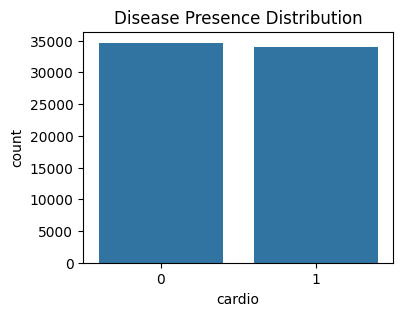

In [273]:
# 0 - No disease
# 1 - Disease

target_temp = df.cardio.value_counts()
print(target_temp)

plt.figure(figsize=(4,3))
sns.countplot(data=df, x='cardio')
plt.title('Disease Presence Distribution')
plt.show()

### Analysing categorical columns

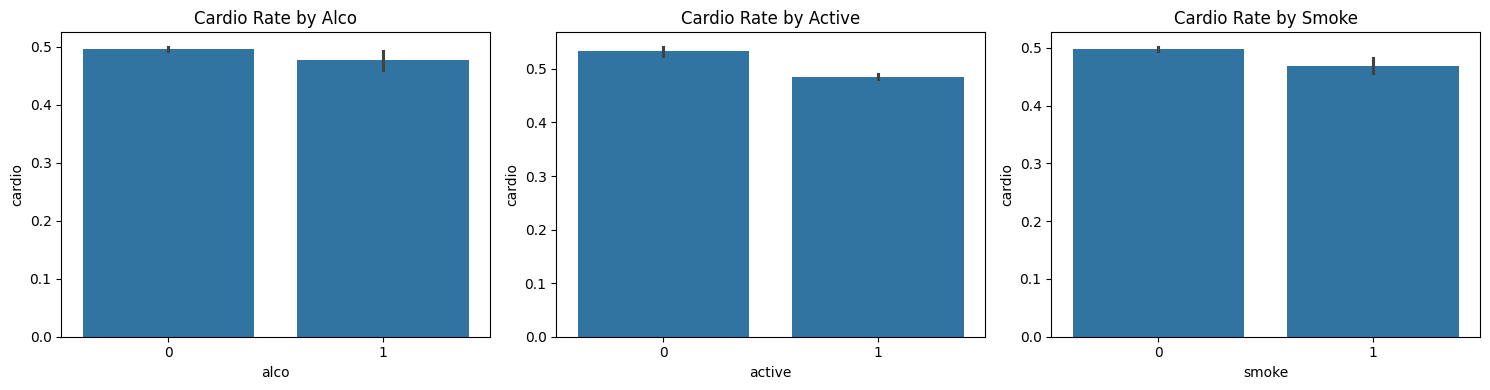

In [275]:
categorical_cols = ['alco','active','smoke']
plots_per_row = 3

rows = math.ceil(len(categorical_cols) / plots_per_row)

plt.figure(figsize=(5 * plots_per_row, 4 * rows))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(rows, plots_per_row, i)
    sns.barplot(data=df, x=col, y='cardio')
    plt.title(f"Cardio Rate by {col.capitalize()}")

plt.tight_layout()
plt.show()

### Analysing numerical columns

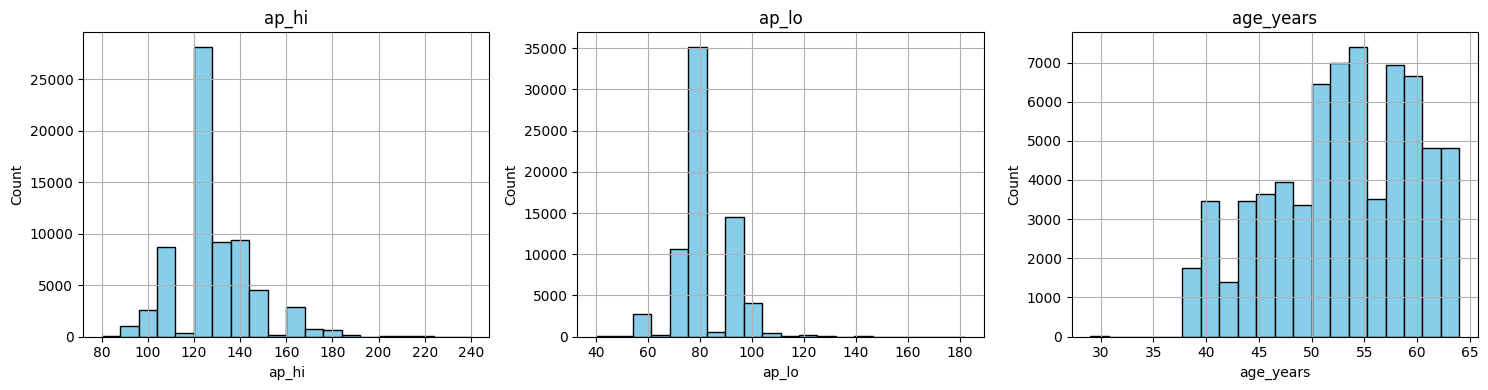

In [277]:
num_cols = ['ap_hi','ap_lo','age_years']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, col in zip(axes, num_cols):
    df[col].hist(ax=ax, bins=20, color='skyblue', edgecolor='black')
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [279]:
df

,age_years,gender,BMI,ap_hi,ap_lo,pulse_pressure,cholesterol_gluc_interaction,smoke,alco,active,cardio,chol_2,chol_3,gluc_2,gluc_3
0,50,1,21.967120,110,80,30,1,0,0,1,0,0,0,0,0
1,55,0,34.927679,140,90,50,3,0,0,1,1,0,1,0,0
2,51,0,23.507805,130,70,60,3,0,0,0,1,0,1,0,0
3,48,1,28.710479,150,100,50,1,0,0,1,1,0,0,0,0
4,47,0,23.011177,100,60,40,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,1,26.927438,120,80,40,1,1,0,1,0,0,0,0,0
69996,61,0,50.472681,140,90,50,4,0,0,1,1,1,0,1,0
69997,52,1,31.353579,180,90,90,3,0,1,0,1,0,1,0,0
69998,61,0,27.099251,135,80,55,2,0,0,0,1,0,0,1,0


### Train/Test Split

In [281]:
df_features = df.copy()

x = df_features.drop('cardio', axis=1)
y = df['cardio']

X_train, X_test, Y_train, Y_test = train_test_split(
    x, y, test_size=0.20, random_state=42, stratify=y
)

In [283]:
X_train.shape

(54891, 14)

In [285]:
X_test.shape

(13723, 14)

In [287]:
Y_train.shape

(54891,)

In [289]:
Y_test.shape

(13723,)

### Preprocessor: Data Scaling and Category Encoding

In [291]:
numerical_cols = ['age_years', 'ap_hi', 'ap_lo', 'BMI', 'pulse_pressure','cholesterol_gluc_interaction']
categorical_cols = [col for col in X_train.columns if col not in numerical_cols]

In [293]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', 'passthrough', categorical_cols)
    ]
)

In [295]:
preprocessor_without_scaling = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', 'passthrough', categorical_cols)
    ]
)

## Model training

In [297]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=42),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth = 8, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=12, min_samples_leaf=4, n_jobs=-1, class_weight='balanced',random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=500, max_depth=6, learning_rate=0.05, subsample=0.8, colsample_bytree=0.8, eval_metric='logloss'),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

In [299]:
best_model_name = ""
best_score = 0
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [301]:
accuracy_dict = {}

### Logistic Regression

In [303]:
pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', models["Logistic Regression"])
    ])
pipe.fit(X_train, Y_train)
y_pred = pipe.predict(X_test)
acc = (accuracy_score(Y_test, y_pred) * 100)
accuracy_dict["Logistic Regression"] = acc
print(f"Logistic Regression Accuracy: {acc :.2f}%")

Logistic Regression Accuracy: 72.66%


### Naive Bayes

In [305]:
pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', models["Naive Bayes"])
    ])
pipe.fit(X_train, Y_train)
y_pred = pipe.predict(X_test)
acc = (accuracy_score(Y_test, y_pred) * 100)
accuracy_dict["Naive Bayes"] = acc
print(f"Naive Bayes Accuracy: {acc :.2f}%")

Naive Bayes Accuracy: 69.69%


### K Nearest Neighbours

In [307]:
pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', models["K-Nearest Neighbors"])
    ])
pipe.fit(X_train, Y_train)
y_pred = pipe.predict(X_test)
acc = (accuracy_score(Y_test, y_pred) * 100)
accuracy_dict["K Nearest Neighbors"] = acc
print(f"K Nearest Neighbours Accuracy: {acc :.2f}%")

K Nearest Neighbours Accuracy: 69.39%


### Decision Tree

In [309]:
pipe = Pipeline([
        ('preprocessor', preprocessor_without_scaling),
        ('model', models["Decision Tree"])
    ])
pipe.fit(X_train, Y_train)
y_pred = pipe.predict(X_test)
acc = (accuracy_score(Y_test, y_pred) * 100)
accuracy_dict["Decision Tree"] = acc
print(f"Decision Tree Accuracy: {acc :.2f}%")

Decision Tree Accuracy: 72.64%


### Random Forest

In [311]:
pipe = Pipeline([
        ('preprocessor', preprocessor_without_scaling),
        ('model', models["Random Forest"])
    ])
pipe.fit(X_train, Y_train)
y_pred = pipe.predict(X_test)
acc = (accuracy_score(Y_test, y_pred) * 100)
accuracy_dict["Random Forest"] = acc
print(f"Random Forest Accuracy: {acc :.2f}%")

Random Forest Accuracy: 72.96%


### XGBoost

In [313]:
pipe = Pipeline([
        ('preprocessor', preprocessor_without_scaling),
        ('model', models["XGBoost"])
    ])
pipe.fit(X_train, Y_train)
y_pred = pipe.predict(X_test)
acc = (accuracy_score(Y_test, y_pred) * 100)
accuracy_dict["XGBoost"] = acc
print(f"XGBoost Accuracy: {acc :.2f}%")

XGBoost Accuracy: 73.06%


### Gradient Boosting

In [315]:
pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', models["Gradient Boosting"])
    ])
pipe.fit(X_train, Y_train)
y_pred = pipe.predict(X_test)
acc = (accuracy_score(Y_test, y_pred) * 100)
accuracy_dict["Gradient Boosting"] = acc
print(f"Gradient Boosting Accuracy: {acc :.2f}%")

Gradient Boosting Accuracy: 73.23%


## Best Model

In [317]:
for model_name, acc in accuracy_dict.items():
    print(f"{model_name}: {acc:.2f}%")

Logistic Regression: 72.66%
Naive Bayes: 69.69%
K Nearest Neighbors: 69.39%
Decision Tree: 72.64%
Random Forest: 72.96%
XGBoost: 73.06%
Gradient Boosting: 73.23%


In [319]:
best_model_name = max(accuracy_dict, key=accuracy_dict.get)
best_accuracy = accuracy_dict[best_model_name]

In [321]:
print(f"Best Model: {best_model_name} with {best_accuracy:.2f}% accuracy.")

Best Model: Gradient Boosting with 73.23% accuracy.


In [323]:
best_model = models[best_model_name]

### Full pipeline

In [325]:
final_pipeline = Pipeline([
    ('preprocessor', preprocessor_without_scaling),
    ('model', best_model)
])
final_pipeline.fit(X_train, Y_train)
y_pred = final_pipeline.predict(X_test)

In [327]:
final_acc = accuracy_score(Y_test, y_pred)
print(f"Final Test Accuracy: {(final_acc*100):.2f}%")

Final Test Accuracy: 73.23%


### Overfitted or Underfitted

In [329]:
train_sizes, train_scores, val_scores = learning_curve(
    estimator=final_pipeline,
    X=X_train,
    y=Y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

In [331]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

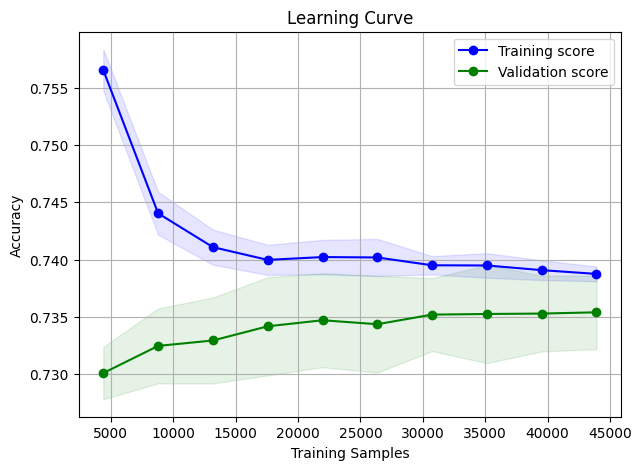

In [333]:
plt.figure(figsize=(7,5))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, val_mean, 'o-', color='green', label='Validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='green')
plt.title("Learning Curve")
plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.savefig("learning_curve.png")
plt.show()

In [335]:
learning_curve_data = [
    {
        "train_size": int(size),
        "train_mean": float(t_mean),
        "train_std": float(t_std),
        "val_mean": float(v_mean),
        "val_std": float(v_std)
    }
    for size, t_mean, t_std, v_mean, v_std in zip(train_sizes, train_mean, train_std, val_mean, val_std)
]

### Train and Test accuracy

In [337]:
Y_train_pred = final_pipeline.predict(X_train)
train_accuracy = round(accuracy_score(Y_train, Y_train_pred) * 100, 2)
print("Training Accuracy:", train_accuracy, "%")

Y_test_pred = final_pipeline.predict(X_test)
test_accuracy = round(accuracy_score(Y_test, Y_test_pred) * 100, 2)
print("Test Accuracy:", test_accuracy, "%")

Training Accuracy: 73.8 %
Test Accuracy: 73.23 %


In [339]:
traintestaccuracy = {
    "train": train_accuracy,
    "test": test_accuracy
}

### Confusion Matrix

In [341]:
y_pred = final_pipeline.predict(X_test)

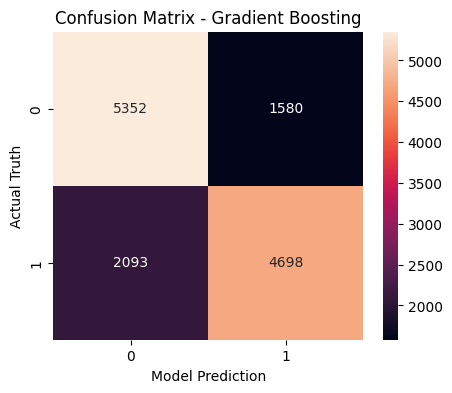

In [343]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='d')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Actual Truth')
plt.xlabel('Model Prediction')
plt.savefig("confusion_matrix.png")
plt.show()

In [345]:
matrix_data = confusion_matrix(Y_test, y_pred)

confusion_matrix_data = [
    {"label": "True Negative",  "value": int(matrix_data[0, 0])},
    {"label": "False Positive", "value": int(matrix_data[0, 1])},
    {"label": "False Negative", "value": int(matrix_data[1, 0])},
    {"label": "True Positive",  "value": int(matrix_data[1, 1])},
]

### Classification Report

In [347]:
report_dict = classification_report(Y_test, y_pred, output_dict = True)

for key, val in report_dict.items():
    if isinstance(val, dict):
        for metric in val:
            if isinstance(val[metric], float):
                val[metric] = round(val[metric], 3)

In [349]:
print("\nClassification Report:")
print(classification_report(Y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      6932
           1       0.75      0.69      0.72      6791

    accuracy                           0.73     13723
   macro avg       0.73      0.73      0.73     13723
weighted avg       0.73      0.73      0.73     13723



### ROC (Receiver Operating Characteristic) Curve and AUC (Area Under the Curve)

In [351]:
y_prob = final_pipeline.predict_proba(X_test)[:,1]

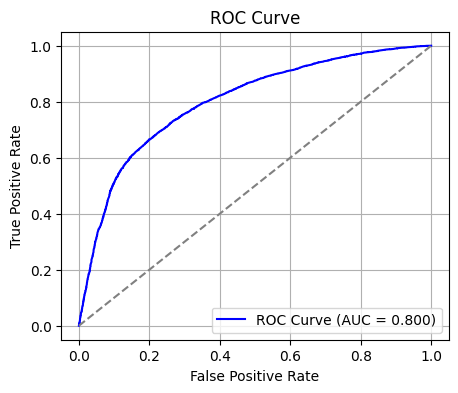

In [353]:
fpr, tpr, _ = roc_curve(Y_test, y_prob)
roc_auc = auc(fpr, tpr)

roc_curve_data = [
    {"fpr": float(fp), "tpr": float(tp)} for fp, tp in zip(fpr, tpr)
]

roc_curve_info = {
    "auc": round(roc_auc, 3),
    "curve": roc_curve_data
}

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig("roc_curve.png")
plt.show()

### Metrics

In [355]:
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)

model_metrics = {
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "rocAuc": roc_auc
}

### Precision - Recall Curve

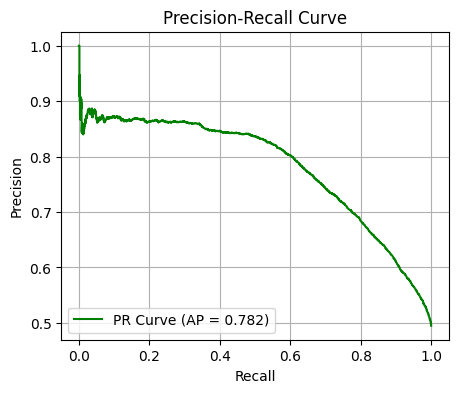

In [357]:
precision, recall, _ = precision_recall_curve(Y_test, y_prob)
pr_auc = average_precision_score(Y_test, y_prob)

pr_curve_data = [
    {"precision": float(p), "recall": float(r)} for p, r in zip(precision, recall)
]

pr_curve_info = {
    "ap": round(pr_auc, 3),
    "curve": pr_curve_data
}

plt.figure(figsize=(5,4))
plt.plot(recall, precision, color='green', label=f'PR Curve (AP = {pr_auc:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.savefig("precision_recall_curve.png")
plt.show()

### Calibration Curve

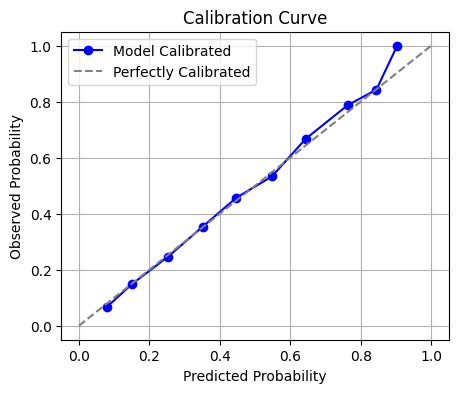

In [359]:
prob_true, prob_pred = calibration_curve(Y_test, y_prob, n_bins=10)

calibration_curve_data = [
    {"predicted": float(p), "observed": float(t)} for p, t in zip(prob_pred, prob_true)
]

calibration_curve_info = {
    "curve": calibration_curve_data
}

plt.figure(figsize=(5,4))
plt.plot(prob_pred, prob_true, marker='o', color='blue', label='Model Calibrated')
plt.plot([0,1], [0,1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Predicted Probability')
plt.ylabel('Observed Probability')
plt.title('Calibration Curve')
plt.legend()
plt.grid(True)
plt.savefig("calibration_curve.png")
plt.show()

### Save Model

In [361]:
joblib.dump(final_pipeline, "../model/final_model.pkl")

['../model/final_model.pkl']

### Save Data

In [365]:
all_data = {
    "metrics": model_metrics,
    "without_heart_disease": without_heart_disease,
    "with_heart_disease": with_heart_disease,
    "trainTestAccuracy": traintestaccuracy,
    "confusionMatrix": confusion_matrix_data,
    "learningCurve": learning_curve_data,
    "classificationReport": report_dict,
    "calibrationCurve": calibration_curve_info,
    "algorithms": accuracy_dict
}

def json_safe(obj):
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    if isinstance(obj, (np.integer, np.floating)):
        return obj.item()
    if isinstance(obj, pd.DataFrame):
        return obj.to_dict(orient="records")
    if isinstance(obj, pd.Series):
        return obj.to_dict()
    raise TypeError(f"{type(obj)} not serializable")

with open("model_all_data.json", "w") as f:
    json.dump(all_data, f, indent=4, default=json_safe)